In [27]:
import pandas as pd
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
pio.renderers.default = 'browser'

After trying to replace the nan values in the "No of hours" attribute. It was figured out that the rows with nan values were originated from either an economic activity of inactive, unemployed, (some of the) full time students or their age group were the one between the ages of 1 to 15. So the actual 'No of hours' value is 0. In order have a meaningful clustering, these rows were excluded.

Also the dataset was decrease to 16000 rows (that were selected randomly) due to memory error of DBSCAN.

In [28]:
data = pd.read_csv(r'C:\Users\Giorgis\Desktop\Projects\ADTA coursework\partI\Clustering\Kmeans\Data.csv')
data.head(10)

,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3
1,365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3
5,524223,2,1,1,3,2,2,2,2,3,6,1,2,11,3,38.0,1
6,467000,3,1,2,5,4,2,1,2,1,2,1,4,11,3,45.0,2
7,461733,2,1,1,3,2,2,1,1,1,2,1,9,12,3,36.0,4
8,477512,2,1,2,5,2,2,1,1,4,2,1,3,9,3,38.0,2
9,472995,1,1,1,2,1,2,1,1,1,1,1,7,8,3,39.0,2


# Choosing the attributes for the Kmeans algorithm 

In [29]:
my_attr = []
for i in data:
    my_attr.append(i)

my_attr

['Unnamed: 0',
 'Family Composition',
 'Population Base',
 'Sex',
 'Age',
 'Marital Status',
 'Student',
 'Country of Birth',
 'Health',
 'Ethnic Group',
 'Religion',
 'Economic Activity',
 'Occupation',
 'Industry',
 'Hours worked per week',
 'No of hours',
 'Approximated Social Grade']

In [30]:
attr_for_clust = data[my_attr]
attr_for_clust

,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3
1,365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,385474,2,1,1,4,2,2,2,3,1,1,1,2,2,3,41.0,1
15996,365580,1,1,1,4,1,2,1,2,1,2,2,5,3,2,17.0,3
15997,338658,2,1,1,6,2,2,1,2,1,2,1,9,9,2,17.0,4
15998,508445,1,1,1,4,1,2,2,2,1,2,1,8,4,3,37.0,4


In [31]:
kmeans = KMeans(2)
kmeans.fit(attr_for_clust)

KMeans(n_clusters=2)

In [32]:
two_cluster_centers = kmeans.cluster_centers_
two_cluster_centers

array([[5.01283204e+05, 2.14939286e+00, 1.00441555e+00, 1.35398013e+00,
        4.14669447e+00, 1.86054213e+00, 1.98773458e+00, 1.17600883e+00,
        1.58959892e+00, 1.29596468e+00, 2.46927511e+00, 1.20642708e+00,
        4.20863486e+00, 6.52471483e+00, 3.25524347e+00, 4.33338648e+01,
        2.14178830e+00],
       [3.68314265e+05, 2.30228113e+00, 1.00458774e+00, 1.59054416e+00,
        4.18733274e+00, 1.92812540e+00, 1.93131133e+00, 1.14094558e+00,
        1.65566459e+00, 1.23282783e+00, 2.42933605e+00, 1.34420798e+00,
        5.03453549e+00, 6.96877788e+00, 2.21409456e+00, 2.68677201e+01,
        2.50031859e+00]])

In [33]:
identified_clusters = kmeans.fit_predict(attr_for_clust)
identified_clusters

array([1, 1, 0, ..., 1, 0, 1])

In [34]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
0,408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3,1
1,365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2,1
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1,0
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1,0
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3,0


In [35]:
cluster0 = data_with_clusters[(data_with_clusters.Cluster == 0)]
cluster1 = data_with_clusters[(data_with_clusters.Cluster == 1)]
cluster0.head()

,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1,0
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1,0
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3,0
5,524223,2,1,1,3,2,2,2,2,3,6,1,2,11,3,38.0,1,0
6,467000,3,1,2,5,4,2,1,2,1,2,1,4,11,3,45.0,2,0


# Creating Dictionaries with the mode of every attribute in the 2 clusters

In [36]:
mdcl0 = cluster0.mode()
mdcl1 = cluster1.mode()
arr0 = np.array(mdcl0.head(1))
arr1 = np.array(mdcl1.head(1))

dict0 = {}
dict1 = {}
a=0
for i in mdcl0:
    dict0[i] = arr0[0][a]
    dict1[i] = arr1[0][a]
    a += 1

In [37]:
my_attr = []
for key0, value0 in dict0.items():
    for key1, value1 in dict1.items():
        if key0 == key1:
            if value0 != value1:
                my_attr.append(key0)
            
my_attr

['Unnamed: 0', 'Sex', 'Age', 'Industry', 'No of hours', 'Cluster']

In [38]:
# my_attr.remove('Hours worked per week')
# my_attr.remove('Cluster')

keeping only the attributes that differ 
between the two clusters

In [39]:
# my_attr

# And executing the KMeans
only with the vital attributes now

In [41]:
attr_for_clust = data_with_clusters[my_attr]

In [42]:
kmeans = KMeans(2)
kmeans.fit(attr_for_clust)

KMeans(n_clusters=2)

In [43]:
two_cluster_centers = kmeans.cluster_centers_
two_cluster_centers

array([[5.01193333e+05, 1.35399314e+00, 4.14637433e+00, 6.52474277e+00,
        4.33292504e+01, 2.20480157e-03],
       [3.68221240e+05, 1.59086269e+00, 4.18772333e+00, 6.96937213e+00,
        2.68494130e+01, 1.00000000e+00]])

In [44]:
identified_clusters2 = kmeans.fit_predict(attr_for_clust)
identified_clusters2

array([0, 0, 1, ..., 0, 1, 0])

In [45]:
data_with_clusters2 = data.copy()
data_with_clusters2['Cluster'] = identified_clusters2
data_with_clusters2


,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
0,408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3,0
1,365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2,0
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1,1
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1,1
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,385474,2,1,1,4,2,2,2,3,1,1,1,2,2,3,41.0,1,0
15996,365580,1,1,1,4,1,2,1,2,1,2,2,5,3,2,17.0,3,0
15997,338658,2,1,1,6,2,2,1,2,1,2,1,9,9,2,17.0,4,0
15998,508445,1,1,1,4,1,2,2,2,1,2,1,8,4,3,37.0,4,1


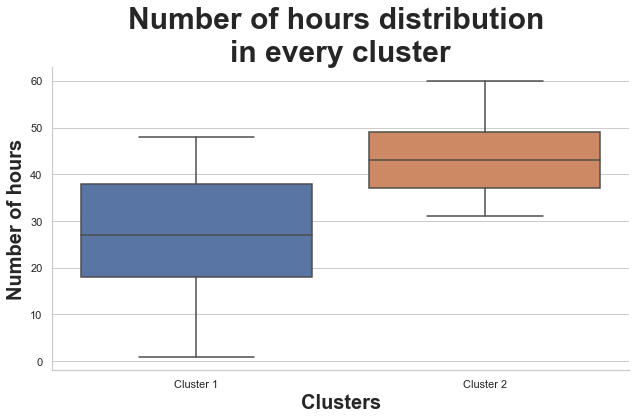

In [46]:
plt.figure(figsize=(9, 6))
sns.set_style('whitegrid')


ax = sns.boxplot(x='Cluster', y='No of hours', data=data_with_clusters2)

ax.set_xlabel('Clusters', size=20, fontweight='bold')
ax.set_ylabel('Number of hours', size=20, fontweight='bold')
ax.set_title('Number of hours distribution \nin every cluster', size=30, fontweight='bold')

# Altering the x axis labels values' names
ax.set_xticklabels(('Cluster 1', 'Cluster 2')) 

plt.setp(ax.get_xticklabels(), size=11)

plt.tight_layout()
sns.despine()

# plt.savefig('2clusters.jpeg')

# KMeans clustering with 3 clusters

In [47]:
kmeans3 = KMeans(3)
kmeans3.fit(attr_for_clust)

KMeans(n_clusters=3)

In [48]:
identified_clusters3 = kmeans3.fit_predict(attr_for_clust)
identified_clusters3

array([1, 0, 2, ..., 0, 2, 0])

In [49]:
data_with_clusters3 = data.copy()
data_with_clusters3['Cluster'] = identified_clusters3
data_with_clusters3

,Unnamed: 0,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade,Cluster
0,408640,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3,1
1,365559,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2,0
2,494056,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1,2
3,560557,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1,2
4,546534,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,385474,2,1,1,4,2,2,2,3,1,1,1,2,2,3,41.0,1,0
15996,365580,1,1,1,4,1,2,1,2,1,2,2,5,3,2,17.0,3,0
15997,338658,2,1,1,6,2,2,1,2,1,2,1,9,9,2,17.0,4,0
15998,508445,1,1,1,4,1,2,2,2,1,2,1,8,4,3,37.0,4,2


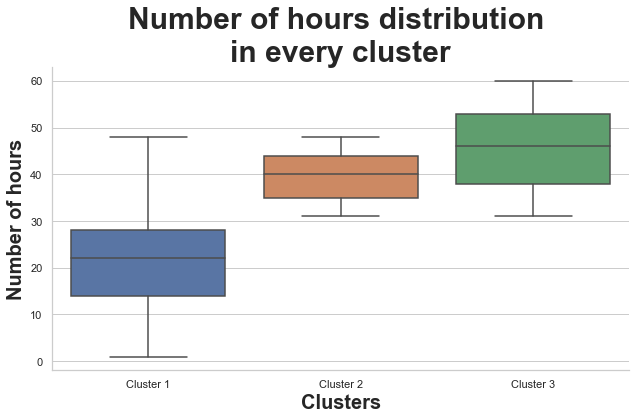

In [50]:
plt.figure(figsize=(9, 6))
sns.set_style('whitegrid')


ax = sns.boxplot(x='Cluster', y='No of hours', data=data_with_clusters3)

ax.set_xlabel('Clusters', size=20, fontweight='bold')
ax.set_ylabel('Number of hours', size=20, fontweight='bold')
ax.set_title('Number of hours distribution \nin every cluster', size=30, fontweight='bold')

# Altering the x axis labels values' names
ax.set_xticklabels(('Cluster 1', 'Cluster 2', 'Cluster 3')) 

plt.setp(ax.get_xticklabels(), size=11)

plt.tight_layout()
sns.despine()

# plt.savefig('3clusters.jpeg')